In [3]:
# 导入矩阵处理的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 导入文件
table = pd.read_excel('./document/护腰枕品牌数据2016-2017.xlsx')

In [18]:
# 覆盖文件转换为时间类型，方便处理
table['年月'] = pd.to_datetime(table['年月'])

In [21]:
# 设置索引序列
table1 = table.set_index('年月')

In [30]:
# 获取16年的数据
table1.loc['2016']

,名称,成交量,销售额指数,高质宝贝数,属性,数据类别,类目
年月,,,,,,,
2016-01-01,joyourbaby/佳韵宝,10073,5340394,22,NaN,品牌数据,护腰枕
2016-01-01,慧鸿佳世,8858,5076721,5,NaN,品牌数据,护腰枕
2016-01-01,嘻嘻兔,6766,1508933,4,NaN,品牌数据,护腰枕
2016-01-01,carebon/可宝,4075,1214350,2,NaN,品牌数据,护腰枕
2016-01-01,枕工坊,3635,1429847,25,NaN,品牌数据,护腰枕
...,...,...,...,...,...,...,...
2016-12-01,cendile,1376,516733,7,NaN,品牌数据,护腰枕
2016-12-01,圣熙,1352,424478,6,NaN,品牌数据,护腰枕
2016-12-01,华丽缘,1007,378156,3,NaN,品牌数据,护腰枕


In [31]:
data_2017 = table1.loc['2017']
data_2016 = table1.loc['2016']

In [33]:
# 保存为Excel表格
# data_2016.to_excel('2016年数据.xlsx')
# data_2017.to_excel('2017年数据.xlsx')

In [34]:
# 写入不同文件夹
import os
os.listdir('./')

['.ipynb_checkpoints',
 'document',
 'excel文档之pandas.ipynb',
 'excel求和.ipynb',
 'ppt_new.pptx',
 'ppt文档+word文档之职业证书.ipynb',
 'ppt文档之修改文字.ipynb',
 'word文档之元素计数.ipynb',
 'word文档之读取文字.ipynb',
 '邢玮-职业奖励.pptx']

In [46]:
# 创建路径,并保存到特定文件夹
if not os.path.exists('2016年/'):
    os.makedirs('2016年')
f_path = os.path.join('2016年','data2016.xlsx')
data_2016.to_excel(f_path)


In [47]:
if not os.path.exists('2017年/'):
    os.makedirs('2017年')
f_path1 = os.path.join('2017年','data2017.xlsx')
data_2017.to_excel(f_path1)

In [48]:
def write_excel(path,file_name,data):
    if not os.path.exists(path):
        os.makedirs(path)
    fpath = os.path.join(path,file_name)
    data.to_excel(fpath)


In [50]:
write_excel('2016年/','2017年.xlsx',data_2017)

In [59]:
files = []
for root,dirs,file_names in os.walk('./'):
    if root in ['./2016年','./2017年']:
        for file_name in file_names:
            fpath = os.path.join(root,file_name)
            temp = pd.read_excel(fpath)
            files.append(temp)
    

In [62]:
total = pd.concat(files)

In [63]:
total.to_excel('汇总表.xlsx')

In [67]:
# 三、数据分析
table2 = total.set_index('年月')

In [78]:
table2.resample('ME')['成交量'].sum()

年月
2016-01-31     58393
2016-02-29     52262
2016-03-31    116716
2016-04-30    102042
2016-05-31    125258
2016-06-30    128914
2016-07-31    139468
2016-08-31    144899
2016-09-30    116581
2016-10-31     88504
2016-11-30     63346
2016-12-31     69792
2017-01-31     55073
2017-02-28    104726
2017-03-31    101631
2017-04-30    101760
2017-05-31    131039
2017-06-30    191361
2017-07-31    193673
2017-08-31    185764
2017-09-30    146840
2017-10-31    129398
2017-11-30     94659
2017-12-31    114573
Freq: ME, Name: 成交量, dtype: int64

In [82]:
data1 = table2.groupby('名称')['成交量'].sum()

In [83]:
data1.head()

名称
alpremio（韩国）        719
babybright        49526
bearmami/倍爱妈咪       402
beimily/蓓美妮       33843
carebon/可宝       101669
Name: 成交量, dtype: int64

In [88]:
plt.rcParams['font.sans-serif'] = 'SimHei'

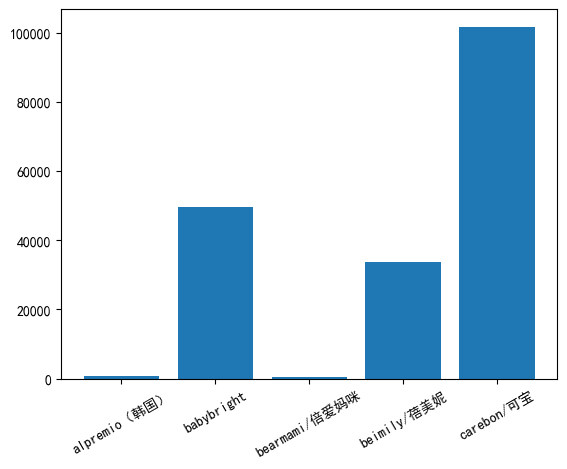

In [92]:
# 柱状图
plt.bar(x=data1.head().index, height=data1.head().values)
_ = plt.xticks(rotation = 30)

<Axes: xlabel='成交量', ylabel='名称'>

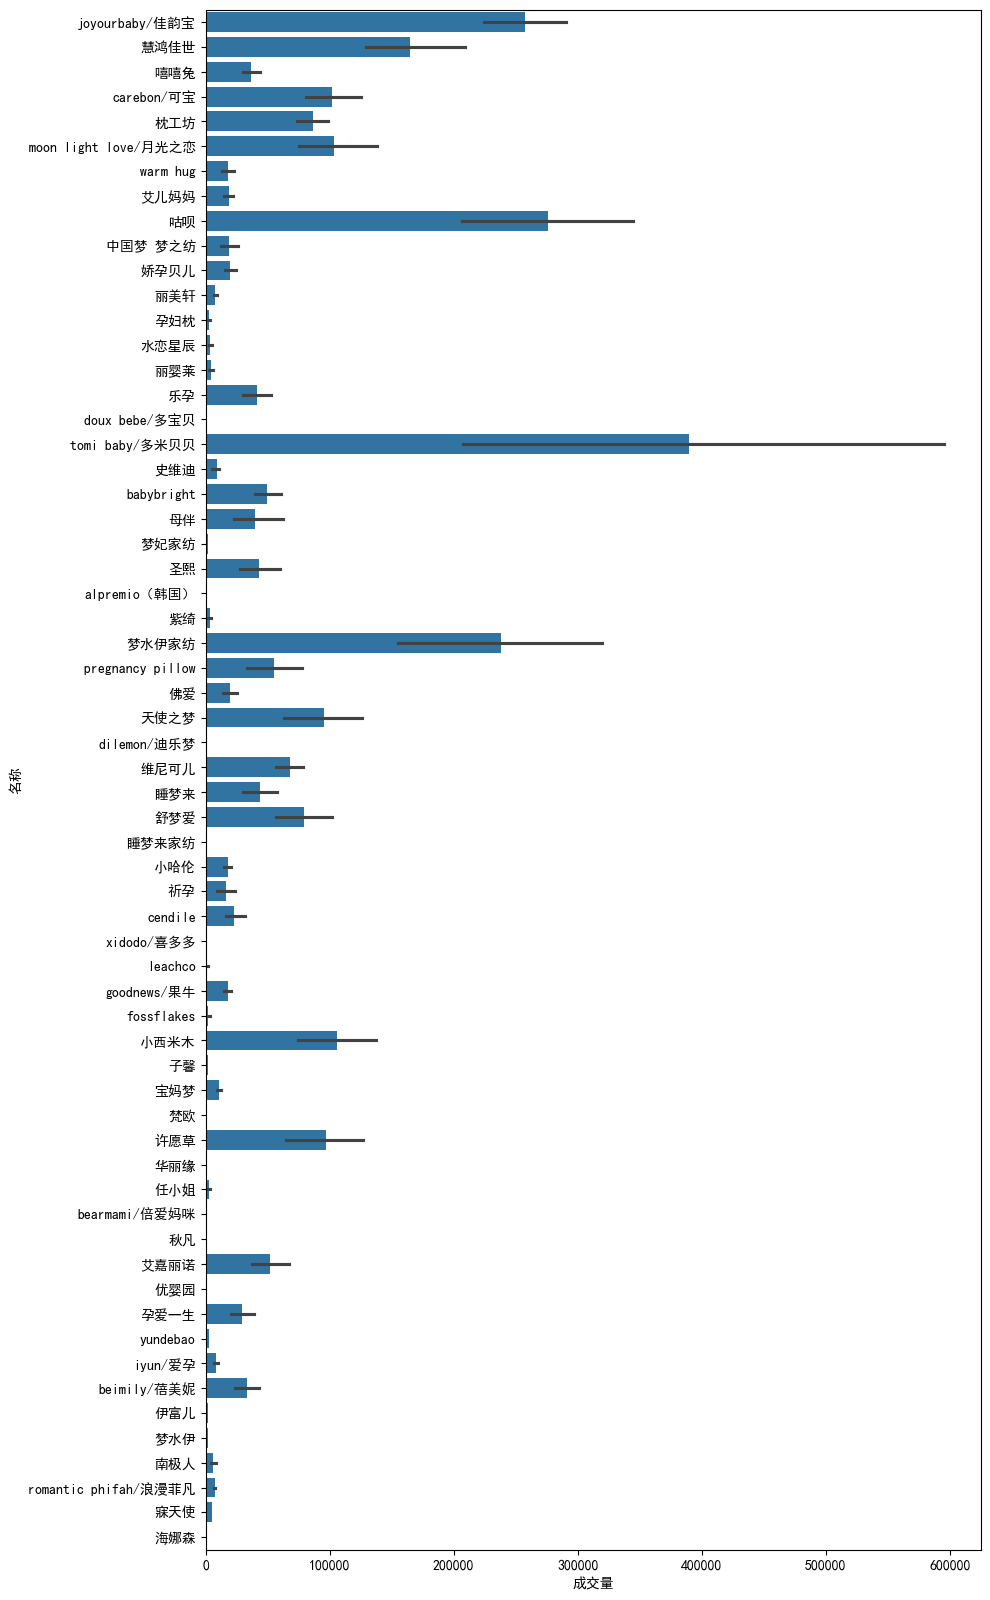

In [104]:
plt.figure(figsize=(10, 20))
sns.barplot(x='成交量', y='名称', estimator=sum, data=table1 )

In [107]:
# 月销量分析
data2016 = table1.loc['2016']

<Axes: xlabel='年月'>

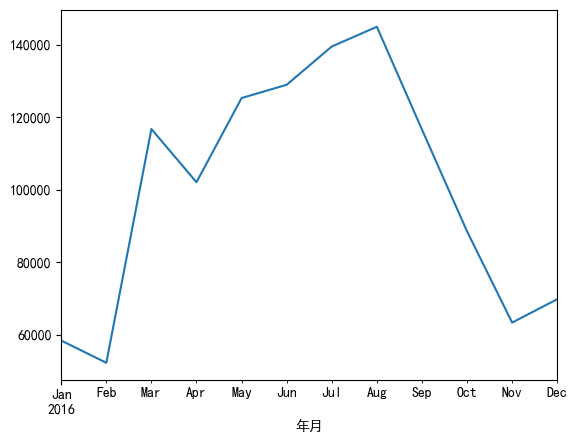

In [109]:
data2016.resample('ME')['成交量'].sum().plot(kind='line')

<Axes: ylabel='成交量'>

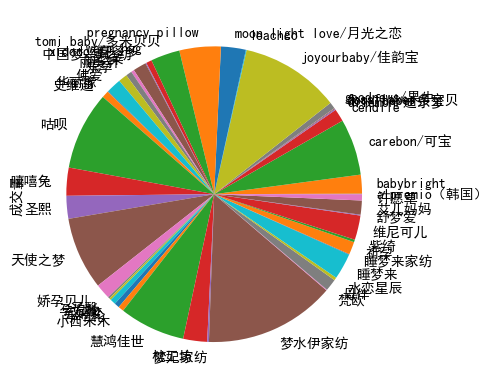

In [110]:
data2016.groupby('名称')['成交量'].sum().plot(kind='pie')

In [120]:
data2016.sort_values('成交量',ascending=False).head(5)[['名称','成交量']]

,名称,成交量
年月,,
2016-06-01,梦水伊家纺,29261
2016-08-01,梦水伊家纺,27924
2016-07-01,梦水伊家纺,26164
2016-05-01,梦水伊家纺,25736
2016-12-01,咕呗,19031


In [121]:
temp1 = data2016.sort_values('成交量',ascending=False).head(5)[['名称','成交量']]

<BarContainer object of 5 artists>

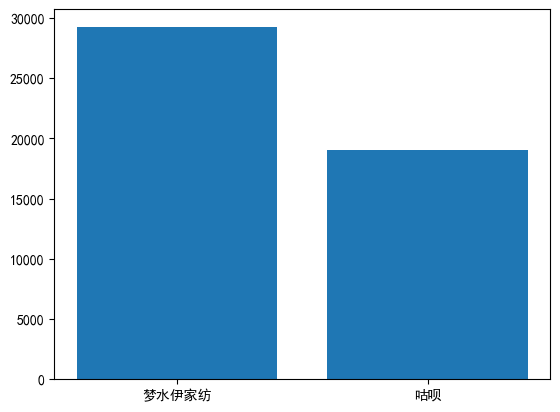

In [122]:
plt.bar(x=temp1['名称'], height=temp1['成交量'])

In [125]:
# 月销量top10热力图分析
pd.DataFrame(data=np.random.randint(0,100,size=(10,10)))

,0,1,2,3,4,5,6,7,8,9
0,65,95,53,30,19,73,1,89,34,67
1,40,4,82,14,59,92,14,64,90,53
2,79,40,25,62,97,20,48,42,35,2
3,60,91,14,90,31,77,37,50,81,87
4,14,38,60,97,10,17,32,2,34,5
5,88,36,45,85,89,59,58,7,56,26
6,26,14,33,23,3,37,5,45,84,85
7,3,8,73,40,43,40,98,93,38,93
8,71,57,16,32,28,49,48,4,28,27
9,87,11,84,45,61,69,3,48,49,21


In [126]:
temp2 = pd.DataFrame(data=np.random.randint(0,100,size=(10,10)))


<Axes: >

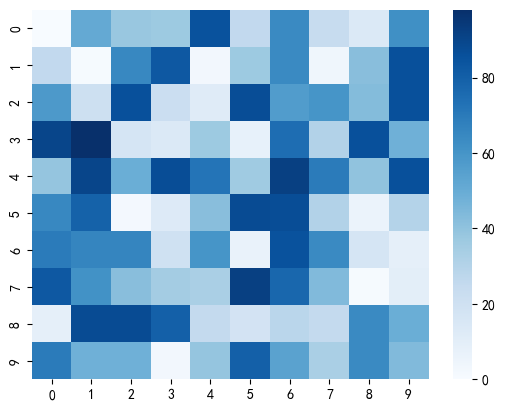

In [128]:
sns.heatmap(temp2,cmap=plt.cm.Blues)

In [130]:
data2016.groupby('名称')['成交量'].sum().sort_values(ascending=False).head(10)

名称
梦水伊家纺               172386
joyourbaby/佳韵宝      131252
咕呗                  102924
天使之梦                 95684
慧鸿佳世                 86793
carebon/可宝           74295
pregnancy pillow     54559
tomi baby/多米贝贝       38385
嘻嘻兔                  36957
睡梦来                  34220
Name: 成交量, dtype: int64

In [131]:
data2016['月份'] = data2016.index.month

C:\Users\XV\AppData\Local\Temp\ipykernel_16924\2075338135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2016['月份'] = data2016.index.month


In [132]:
data2016

,名称,成交量,销售额指数,高质宝贝数,属性,数据类别,类目,月份
年月,,,,,,,,
2016-01-01,joyourbaby/佳韵宝,10073,5340394,22,NaN,品牌数据,护腰枕,1
2016-01-01,慧鸿佳世,8858,5076721,5,NaN,品牌数据,护腰枕,1
2016-01-01,嘻嘻兔,6766,1508933,4,NaN,品牌数据,护腰枕,1
2016-01-01,carebon/可宝,4075,1214350,2,NaN,品牌数据,护腰枕,1
2016-01-01,枕工坊,3635,1429847,25,NaN,品牌数据,护腰枕,1
...,...,...,...,...,...,...,...,...
2016-12-01,cendile,1376,516733,7,NaN,品牌数据,护腰枕,12
2016-12-01,圣熙,1352,424478,6,NaN,品牌数据,护腰枕,12
2016-12-01,华丽缘,1007,378156,3,NaN,品牌数据,护腰枕,12


In [136]:
pivot_data = data2016.pivot_table(index='月份',columns='名称',values='成交量',fill_value=0)

<Axes: xlabel='名称', ylabel='月份'>

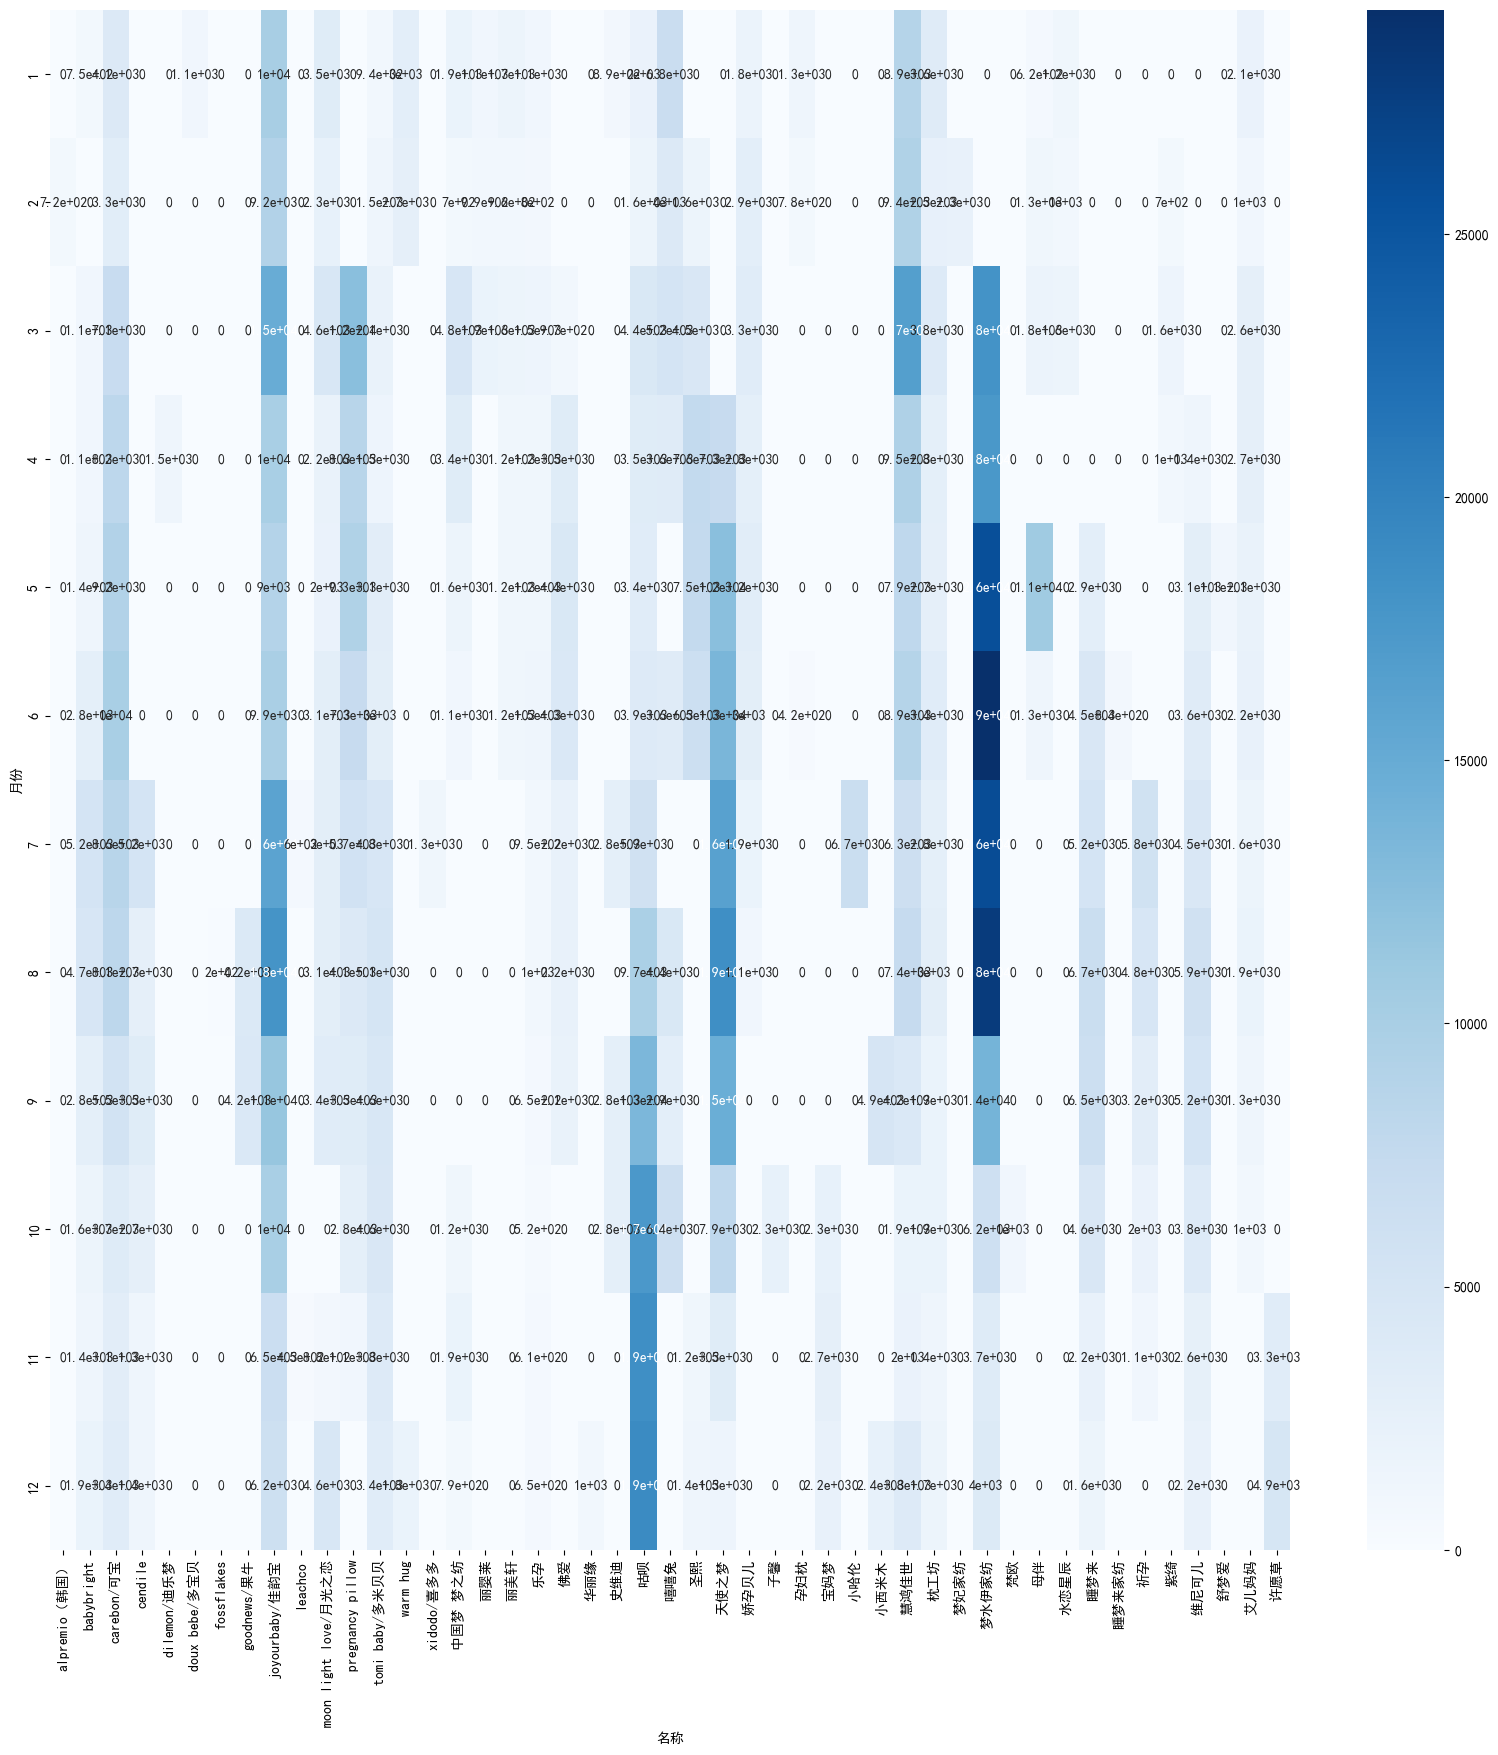

In [139]:
plt.figure(figsize=(20,20))
sns.heatmap(pivot_data,annot=True,cmap=plt.cm.Blues)